# **0. Setting up the defaults**


## **Import libraries**

First we need to import the libraries that we will be using. The used libraries and their function are listed below. 

>Pandas: used for dataset manipulation

>Numpy: used for array manipulation

>Matplotlib: used for visualisation

>Seaborn: used for visualisation

>Sklearn: used for fitting models

>Roc_curve, Roc_auc_score: Curve of performance of a classifier based on how daring it is in calling things positive. More info in this [video](https://https://www.youtube.com/watch?v=UrqPyE4H2bI)

>itertools: used for feature set search

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, plot_confusion_matrix, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from itertools import combinations, chain

# **Import dataset from drive**
Secondly, we're importing the dataset from drive, which can be found [here](https://drive.google.com/file/d/1C9eI8fUoEKVkbcRWCKIyK70XeI-H1XeD/view?usp=sharing)

To do this we first need to enable access to drive. 
Running this code will present a pop-up where you will need to grant access

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Next we will grab the file from drive

In order to be able to read it, we use the file ID from the URL with /uc?id= to get a direct download like which can be saved as a pandas dataframe.

In [3]:
url='https://drive.google.com/file/d/1C9eI8fUoEKVkbcRWCKIyK70XeI-H1XeD/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
init_df = pd.read_csv(url)

In case you are running this locally, don't run the drive related blocks, but use the code block below

In [4]:
#init_df = pd.read_csv('recruitmentdataset-2022-1.3.csv')

When we've imported the dataset, let's save it under the df variable (dataframe)

In [5]:
# df is a copy of the initial df so we don't have to redownload many times
df = init_df.copy()

Let's take an initial look at the data


In [6]:
df

,Id,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company,decision
0,x8011e,female,24,German,Swimming,70,False,False,False,False,1,True,phd,A,True
1,x6077a,male,26,German,Golf,67,False,True,False,False,2,True,bachelor,A,False
2,x6006e,female,23,Dutch,Running,67,False,True,True,False,0,True,master,A,False
3,x2173b,male,24,Dutch,Cricket,70,False,True,False,False,1,True,master,A,True
4,x6241a,female,26,German,Golf,59,False,False,False,False,1,False,master,A,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,x7640e,female,28,Dutch,Running,63,False,False,False,False,0,False,master,D,False
3996,x3310f,female,27,Dutch,Tennis,62,False,False,False,True,2,True,bachelor,D,False
3997,x1202g,male,24,Belgian,Rugby,60,True,False,False,True,2,False,bachelor,D,False
3998,x1263d,female,22,Dutch,Tennis,66,False,True,False,False,1,True,bachelor,D,False


Next up, it is time to get to work with this data. 
The assignment consists out of 4 phases
> **Exploration:** We need to explore the dataset for information content, feature distribution and feature correlation. This means looking at the distribution of our features, learning the data type of the features and correlations


> **Data Pre-processing:** We need to make sure that we have the correct data sets that contain data of the population, our company and potentially the other companies. Then we want to make sure to create data sets with the features for each model and encode where needed. Some of this stuff can be done before the exploration, the rest will have to wait until we learn more of the data.


> **Model fitting:** We need to train 3 models consisting of


1.   Decision Trees with Random Forests to find our best indicators
2.   Support Vector for testing found indicators and comparison with
3.   Support Vector with descriptors


> **Result Analysis:** Visualize the results that we obtain from the models to interpret results and evaluate performance

# **1. Initial Data Pre-processing**

Before we even start with data exploration, there's a few steps we can already take to tidy up out data. 

First off, we  know from *id : a unique identifier. Do not use in your algorithm* that we can drop the id feature from the dataset

Then, we can create a couple of separate datasets for the steps that we've already seen. 

-Company dataset: Contains all the data for our company B

-Population dataset: contains the population of A,B,C,D which we need to use for exploration

-Indicator dataset: Contains only the indicator features and results for Model 2

-Description dataset: Contains only the descriptor features and results for Model 3

So let's first drop id from out dataset

In [7]:
df = df.drop('Id', axis=1)

As you can see below here, we no longer have an Id feature

In [8]:
df

,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company,decision
0,female,24,German,Swimming,70,False,False,False,False,1,True,phd,A,True
1,male,26,German,Golf,67,False,True,False,False,2,True,bachelor,A,False
2,female,23,Dutch,Running,67,False,True,True,False,0,True,master,A,False
3,male,24,Dutch,Cricket,70,False,True,False,False,1,True,master,A,True
4,female,26,German,Golf,59,False,False,False,False,1,False,master,A,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,female,28,Dutch,Running,63,False,False,False,False,0,False,master,D,False
3996,female,27,Dutch,Tennis,62,False,False,False,True,2,True,bachelor,D,False
3997,male,24,Belgian,Rugby,60,True,False,False,True,2,False,bachelor,D,False
3998,female,22,Dutch,Tennis,66,False,True,False,False,1,True,bachelor,D,False


Next, let's rename some of the indicator columns such that we can use them in code later on, as the ind-name leads to Python seeing this as a df.ind function that does not exist.

In [9]:
df.rename(columns = {'ind-university_grade':'ind_university_grade', 'ind-debateclub':'ind_debateclub', 'ind-programming_exp':'ind_programming_exp', 'ind-international_exp':'ind_international_exp', 'ind-entrepeneur_exp':'ind_entrepeneur_exp', 'ind-languages':'ind_languages', 'ind-exact_study':'ind_exact_study', 'ind-degree':'ind_degree'  }, inplace = True)

In [10]:
df

,gender,age,nationality,sport,ind_university_grade,ind_debateclub,ind_programming_exp,ind_international_exp,ind_entrepeneur_exp,ind_languages,ind_exact_study,ind_degree,company,decision
0,female,24,German,Swimming,70,False,False,False,False,1,True,phd,A,True
1,male,26,German,Golf,67,False,True,False,False,2,True,bachelor,A,False
2,female,23,Dutch,Running,67,False,True,True,False,0,True,master,A,False
3,male,24,Dutch,Cricket,70,False,True,False,False,1,True,master,A,True
4,female,26,German,Golf,59,False,False,False,False,1,False,master,A,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,female,28,Dutch,Running,63,False,False,False,False,0,False,master,D,False
3996,female,27,Dutch,Tennis,62,False,False,False,True,2,True,bachelor,D,False
3997,male,24,Belgian,Rugby,60,True,False,False,True,2,False,bachelor,D,False
3998,female,22,Dutch,Tennis,66,False,True,False,False,1,True,bachelor,D,False


**Company Dataset**

The company dataset contains all the instances where the value for the 'company' feature = B. 
So let's select all these instances and put them in com_df

In [11]:
com_df = df[df.company == 'B']

For potential comparison stats, let's also create datasets for the other companies

In [12]:
A_df = df[df.company == 'A']
C_df = df[df.company == 'C']
D_df = df[df.company == 'D']

Below you can see now that com_df only contains 1000 instances instead of 4000 of the full set

In [13]:
com_df

,gender,age,nationality,sport,ind_university_grade,ind_debateclub,ind_programming_exp,ind_international_exp,ind_entrepeneur_exp,ind_languages,ind_exact_study,ind_degree,company,decision
1000,female,21,Dutch,Swimming,58,False,False,False,False,0,True,bachelor,B,False
1001,female,27,Dutch,Chess,67,False,False,True,False,0,True,master,B,False
1002,female,25,Dutch,Rugby,56,True,False,False,False,2,False,bachelor,B,True
1003,female,28,Dutch,Chess,64,False,False,True,False,0,True,master,B,False
1004,male,30,Dutch,Rugby,63,True,False,False,True,3,False,master,B,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,male,28,Dutch,Tennis,71,False,False,False,True,2,True,bachelor,B,True
1996,female,23,Belgian,Cricket,55,False,False,False,False,1,True,bachelor,B,False
1997,male,26,Dutch,Football,58,True,False,False,True,2,False,bachelor,B,True
1998,female,23,German,Running,61,False,True,False,False,1,True,bachelor,B,False


We can further tidy up this dataset by removing the company column, since we know that all our candidates are from Company B, which means that this feature will have no predictive power

In [14]:
com_df = com_df.drop('company', axis=1)

**Population Dataset**

Speaking of the full dataset, we also need to have a population dataset for our exploration comparisons. 

This pop_df contains all the instances regardless of company, and is thus just the original df

In [15]:
pop_df = df

Let's check

In [16]:
pop_df

,gender,age,nationality,sport,ind_university_grade,ind_debateclub,ind_programming_exp,ind_international_exp,ind_entrepeneur_exp,ind_languages,ind_exact_study,ind_degree,company,decision
0,female,24,German,Swimming,70,False,False,False,False,1,True,phd,A,True
1,male,26,German,Golf,67,False,True,False,False,2,True,bachelor,A,False
2,female,23,Dutch,Running,67,False,True,True,False,0,True,master,A,False
3,male,24,Dutch,Cricket,70,False,True,False,False,1,True,master,A,True
4,female,26,German,Golf,59,False,False,False,False,1,False,master,A,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,female,28,Dutch,Running,63,False,False,False,False,0,False,master,D,False
3996,female,27,Dutch,Tennis,62,False,False,False,True,2,True,bachelor,D,False
3997,male,24,Belgian,Rugby,60,True,False,False,True,2,False,bachelor,D,False
3998,female,22,Dutch,Tennis,66,False,True,False,False,1,True,bachelor,D,False


**Indicator Dataset**

For Model 1 and 2 we need to create a company B dataset which only has the Indicator features, as we're not allowed to use any other features.

So let's first list all the indicator and descriptor features mentioned in the assignment (*Notice that some of the names are not the same for the indicators as on the canvas page, as well was ind-degree being in our dataset instead of ind-univ-grade, and the existence of personality_type*)

In [17]:
indicator = [ 'ind_debateclub', 'ind_programming_exp', 'ind_international_exp', 'ind_entrepeneur_exp', 'ind_languages', 'ind_exact_study', 'ind_degree', 'ind_university_grade' ]

descriptor = ['gender', 'age', 'nationality', 'sport']

Now that we've classified the features, we can construct ind_df by dropping all the descriptor features from our company df

In [18]:
ind_df = com_df.drop(descriptor, axis=1)

Let's take a look at it

In [19]:
ind_df

,ind_university_grade,ind_debateclub,ind_programming_exp,ind_international_exp,ind_entrepeneur_exp,ind_languages,ind_exact_study,ind_degree,decision
1000,58,False,False,False,False,0,True,bachelor,False
1001,67,False,False,True,False,0,True,master,False
1002,56,True,False,False,False,2,False,bachelor,True
1003,64,False,False,True,False,0,True,master,False
1004,63,True,False,False,True,3,False,master,True
...,...,...,...,...,...,...,...,...,...
1995,71,False,False,False,True,2,True,bachelor,True
1996,55,False,False,False,False,1,True,bachelor,False
1997,58,True,False,False,True,2,False,bachelor,True
1998,61,False,True,False,False,1,True,bachelor,False


**Descriptor Dataset**

The descriptor dataset des_df is the same process, but now we drop all the indicator features


In [20]:
des_df = com_df.drop(indicator, axis=1)

Let's take a look at it

In [21]:
des_df

,gender,age,nationality,sport,decision
1000,female,21,Dutch,Swimming,False
1001,female,27,Dutch,Chess,False
1002,female,25,Dutch,Rugby,True
1003,female,28,Dutch,Chess,False
1004,male,30,Dutch,Rugby,True
...,...,...,...,...,...
1995,male,28,Dutch,Tennis,True
1996,female,23,Belgian,Cricket,False
1997,male,26,Dutch,Football,True
1998,female,23,German,Running,False


# **2. Data Exploration**




To explore the Data, let us go and play around with a correlation matrix, missing values and feature exploration.

First, let us take a look at the correlation matrix

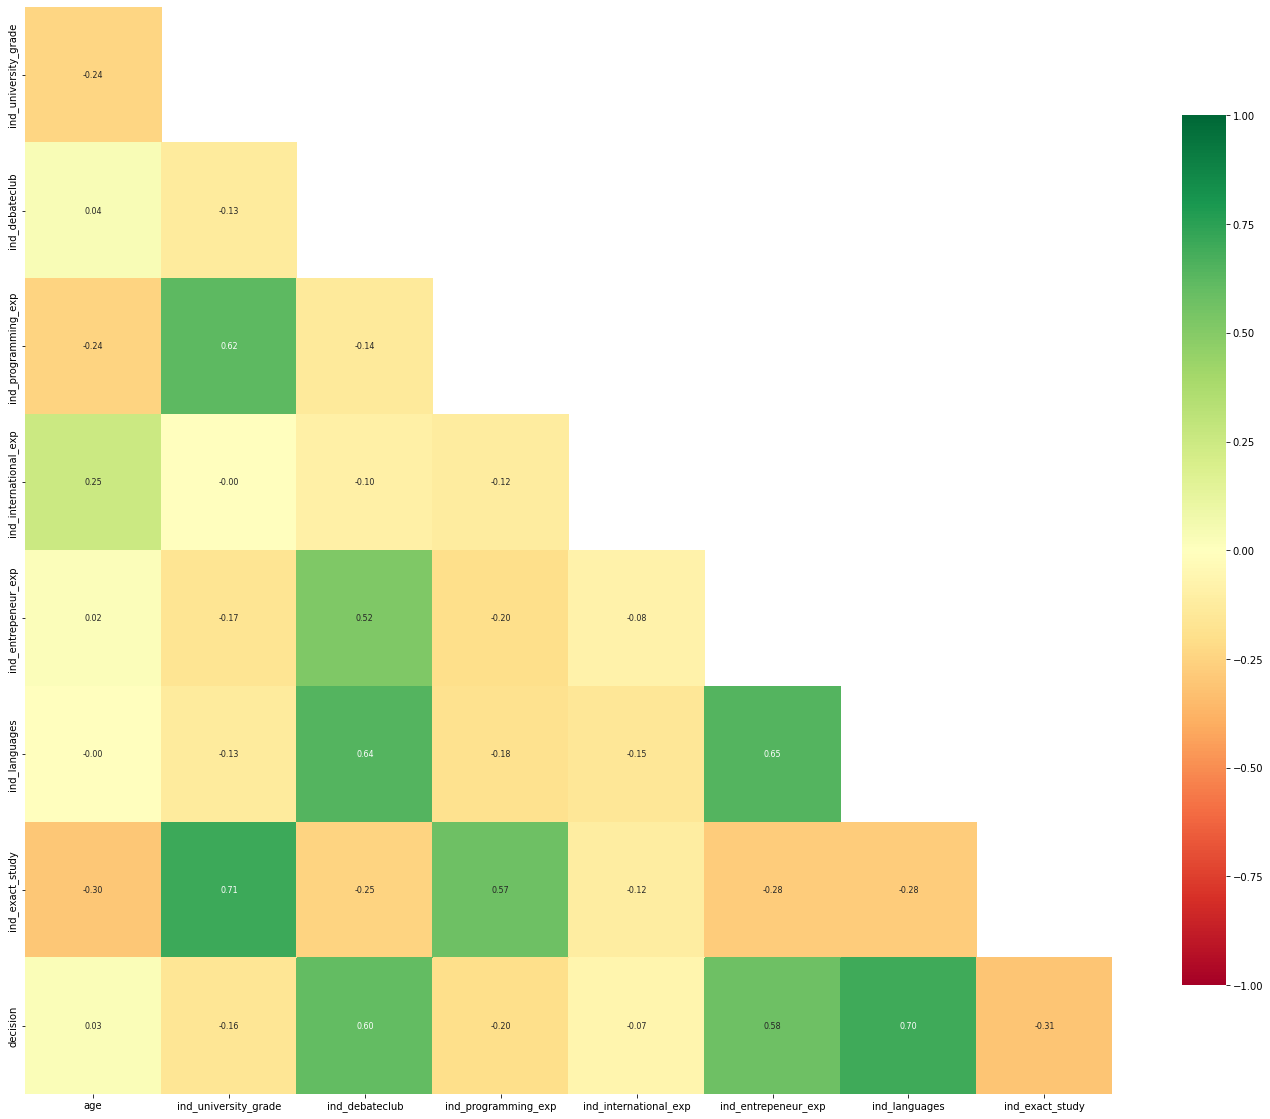

<Figure size 432x288 with 0 Axes>

In [22]:
# Create correlation between these columns of data
corr = com_df.corr()

plt.figure(figsize=(25,20))

# Create array of 0s in same shape as corr.shape
mask = np.zeros_like(corr)
# Take upper triangle of the shape of 0s
mask[np.triu_indices_from(mask)] = True

# Change mask and correlation to remove empty rows
mask = mask[1:, :-1]
corr = corr.iloc[1:,:-1].copy()

# Choose a diverging palette for the r values (0 should be white)
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Plot the heatmap
sns.heatmap(corr,         # Create heatmap of the df.corr created above
            mask=mask,    # Use the mask to not show repeated boxes
            annot=True,   # Annotate the squares with the r value
            fmt=".2f",    # Use 2 decimals
            annot_kws={"size": 8}, 
            cmap='RdYlGn',    # cmap is the diverging one created above
            square=True,  # Square boxes look better
            cbar_kws={"shrink": .8}, # Shrink color bar to center it
            vmin=-1, vmax=1) # Max and Min values for the colors

plt.show()
plt.savefig('correlation_matrix.png')

For data exploration, it is also interesting to compare our company correlation matrix to the population dataset

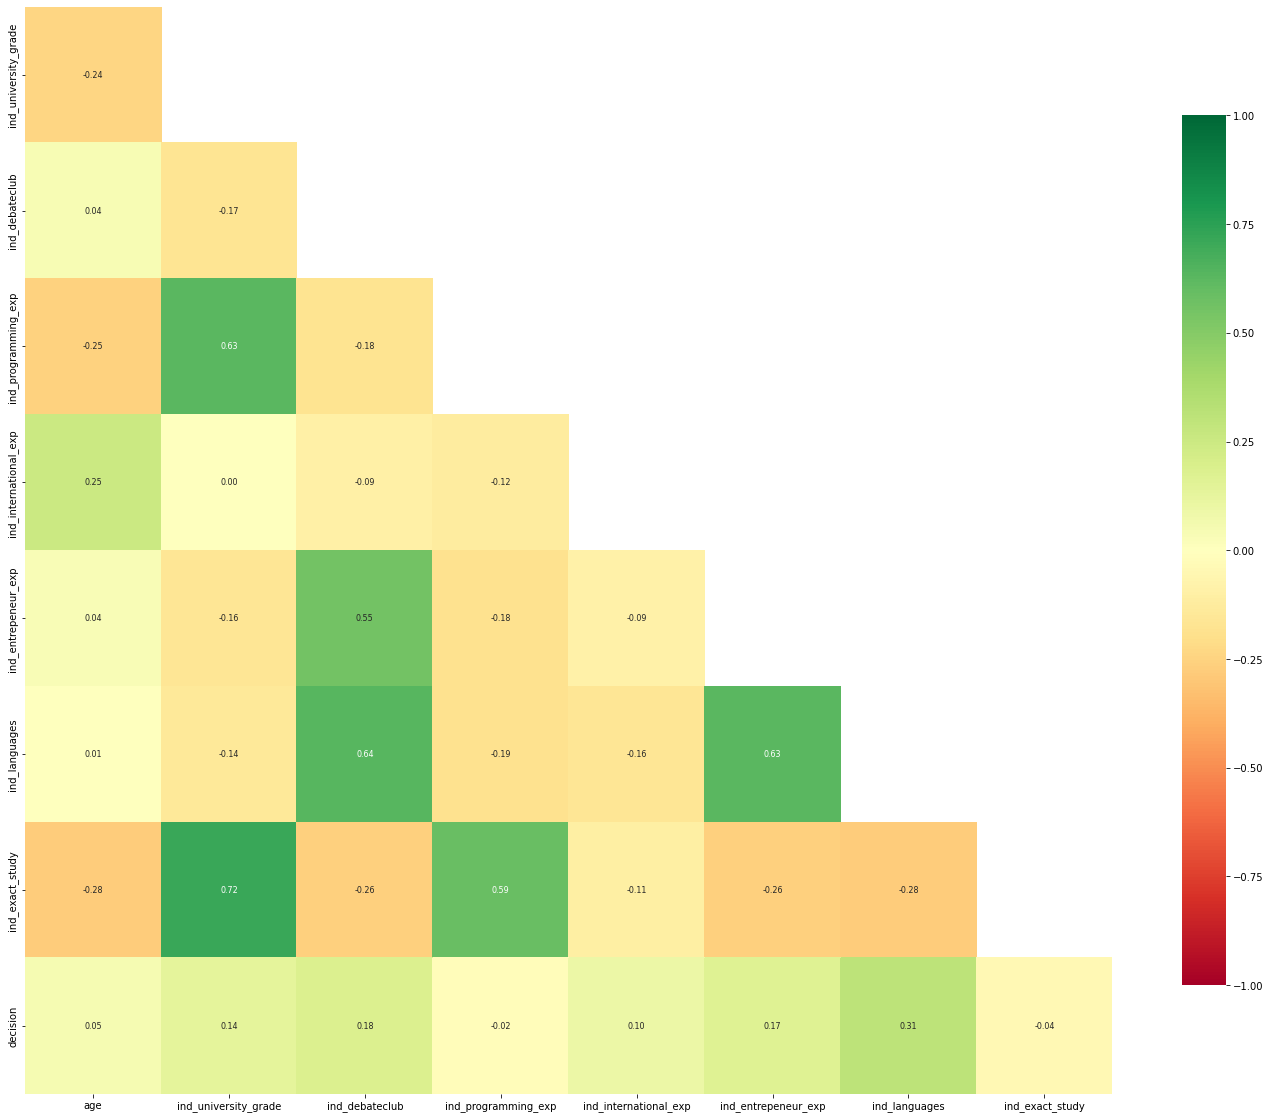

<Figure size 432x288 with 0 Axes>

In [23]:
# Create correlation between these columns of data
corr = df.corr()

plt.figure(figsize=(25,20))

# Create array of 0s in same shape as corr.shape
mask = np.zeros_like(corr)
# Take upper triangle of the shape of 0s
mask[np.triu_indices_from(mask)] = True

# Change mask and correlation to remove empty rows
mask = mask[1:, :-1]
corr = corr.iloc[1:,:-1].copy()

# Choose a diverging palette for the r values (0 should be white)
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Plot the heatmap
sns.heatmap(corr,         # Create heatmap of the df.corr created above
            mask=mask,    # Use the mask to not show repeated boxes
            annot=True,   # Annotate the squares with the r value
            fmt=".2f",    # Use 2 decimals
            annot_kws={"size": 8}, 
            cmap='RdYlGn',    # cmap is the diverging one created above
            square=True,  # Square boxes look better
            cbar_kws={"shrink": .8}, # Shrink color bar to center it
            vmin=-1, vmax=1) # Max and Min values for the colors

plt.show()
plt.savefig('correlation_matrix.png')

What we find for our company B here is that Decision is most highly correlated with ind-languages, ind-debateclub and ind-enterpeneur_exp, and the least correlated with age and ind-international_exp. This may be important to keep in mind with picking indicators for our methods.

Next, let us check whether we have any missing data in our dataset

In [24]:
missing_data = com_df.isna().sum().to_frame()
list_of_features = []
for index, row in missing_data.iterrows():
    if row[0] > 0:
        list_of_features.append((index, row[0]))
sorted_list = sorted(list_of_features, key=lambda index: index[1], reverse=True)
print(sorted_list)

[]


We can also check it using a heatmap of null values in our dataset. This should also show we have no missing value

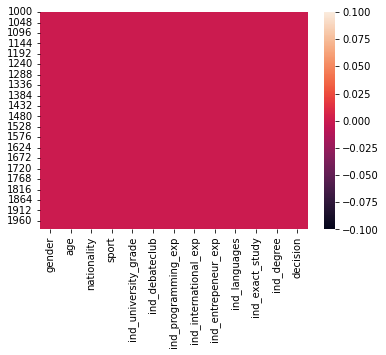

In [25]:
sns.heatmap(com_df.isnull())

Seems like there is no obvious missing data in the form of NaNs.
That does not mean that we don't have any missing data, we could still have 0s representing missing data (for number of languages this may very well be likely). 

So next up, let's explore all the features individually and see what data they contain

###gender

The gender feature consists of nominal categoric data, so let's first see what categories are present

In [26]:
com_df.gender.unique()

array(['female', 'male', 'other'], dtype=object)

Now let's see what the comparison is between them

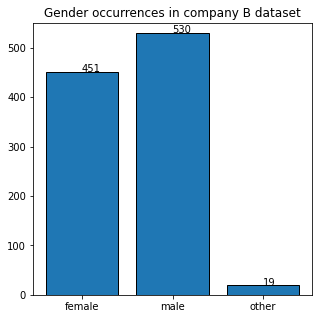

In [27]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

genders = [com_df['gender'].where(com_df['gender'] == 'female').count(), com_df['gender'].where(com_df['gender'] == 'male').count(), com_df['gender'].where(com_df['gender'] == 'other').count()]
gender_label = ['female', 'male', 'other']

fig = plt.figure(figsize =(5, 5))
plt.ylim([0,550])
plt.title('Gender occurrences in company B dataset')
plt.bar(gender_label, genders, ec='black')
addlabels(gender_label, genders)
plt.show()

###age

Since Age is ratio data, we can use the describe function and a histogram to take a look at the data

In [28]:
com_df.age.describe()

count    1000.00000
mean       26.30700
std         2.81081
min        21.00000
25%        24.00000
50%        26.00000
75%        28.00000
max        32.00000
Name: age, dtype: float64

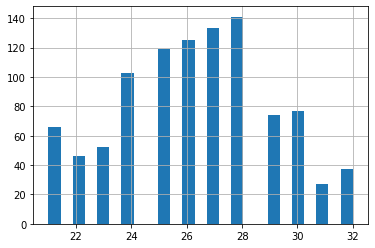

In [29]:
com_df.age.hist(bins=25)

What we find here is that we have ages between 21-32 with a not-entirely, but somewhat normal distribution. Furthermore, we can assume that there are no missing values indicated by a 0 or 100 in age

###nationality

Nationality is also nominal categorical data, so we can take a look at it again like Gender

In [30]:
com_df.nationality.unique()

array(['Dutch', 'Belgian', 'German'], dtype=object)

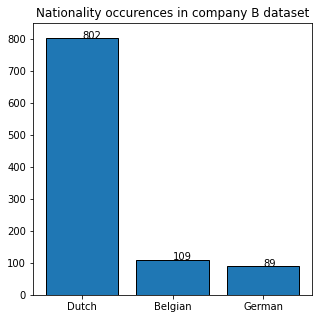

In [31]:
nationalities = [com_df['nationality'].where(com_df['nationality'] == 'Dutch').count(), com_df['nationality'].where(com_df['nationality'] == 'Belgian').count(), com_df['nationality'].where(com_df['nationality'] == 'German').count()]
nationality_label = ['Dutch', 'Belgian', 'German']

fig = plt.figure(figsize =(5, 5))
plt.ylim([0,850])
plt.title('Nationality occurences in company B dataset')
plt.bar(nationality_label, nationalities, ec='black')
addlabels(nationality_label, nationalities)
plt.show()

Here we see that we have an abundance of Dutch people, with similar numbers of Belgians and Germans. Again, no missing values

###sport

Sport is nominal categoric data, so we do the same

In [32]:
com_df.sport.unique()

array(['Swimming', 'Chess', 'Rugby', 'Football', 'Tennis', 'Cricket',
       'Golf', 'Running'], dtype=object)

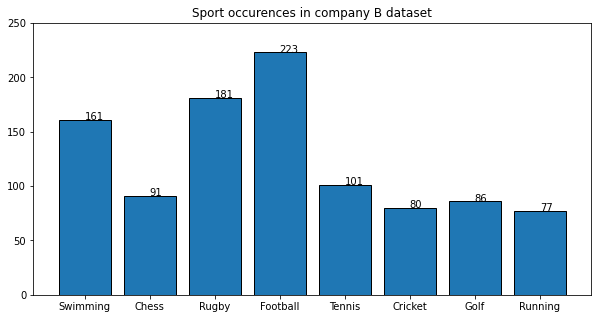

In [33]:
sports = [com_df['sport'].where(com_df['sport'] == 'Swimming').count(), com_df['sport'].where(com_df['sport'] == 'Chess').count(), com_df['sport'].where(com_df['sport'] == 'Rugby').count(), com_df['sport'].where(com_df['sport'] == 'Football').count(), com_df['sport'].where(com_df['sport'] == 'Tennis').count(), com_df['sport'].where(com_df['sport'] == 'Cricket').count(), com_df['sport'].where(com_df['sport'] == 'Golf').count(), com_df['sport'].where(com_df['sport'] == 'Running').count() ]
sports_label = ['Swimming', 'Chess', 'Rugby', 'Football', 'Tennis', 'Cricket','Golf', 'Running']

fig = plt.figure(figsize =(10, 5))
plt.ylim([0,250])
plt.title('Sport occurences in company B dataset')
plt.bar(sports_label, sports, ec='black')
addlabels(sports_label, sports)
plt.show()

What we find here is that there is a somewhat uniform distribution of sports, with Swimming, Rugby and Football standing out. No missing data again.

###ind_university_grade

ind_university_grade is ratio data, so we do the same as age


In [34]:
com_df.ind_university_grade.describe()

count    1000.000000
mean       62.348000
std         6.015237
min        47.000000
25%        58.000000
50%        62.000000
75%        67.000000
max        78.000000
Name: ind_university_grade, dtype: float64

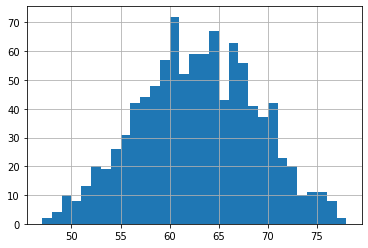

In [35]:
com_df.ind_university_grade.hist(bins=31)

What we see here is that university grades are distributed normally with no missing vlaues or extreme outliers

###ind_debateclub

With ind_debateblub being a boolean category, we expect to only see True and False, let's see whether this is actually the case

In [36]:
com_df.ind_debateclub.unique()

array([False,  True])

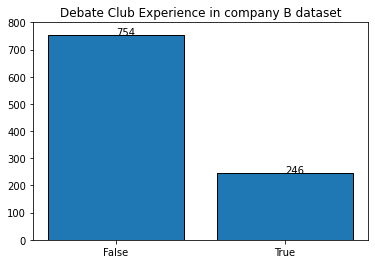

In [37]:
debate_club = [com_df['ind_debateclub'].where(com_df['ind_debateclub'] == False).count(), com_df['ind_debateclub'].where(com_df['ind_debateclub'] == True).count()]
debate_labels = ["False", "True"]
plt.ylim([0,800])
plt.title('Debate Club Experience in company B dataset')
plt.bar(debate_labels, debate_club, ec='black')
addlabels(debate_labels, debate_club)
plt.show()

Here we see that most candidates are not in a debateclub and there are no missing values

###ind_programming_exp

ind_programming_exp is another boolean category, so let's check for missing values and distribution

In [38]:
com_df.ind_programming_exp.unique()

array([False,  True])

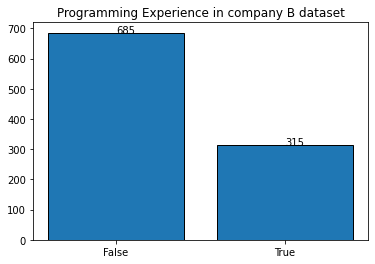

In [39]:
programming = [com_df['ind_programming_exp'].where(com_df['ind_programming_exp'] == False).count(), com_df['ind_programming_exp'].where(com_df['ind_programming_exp'] == True).count()]
programming_labels = ["False", "True"]
plt.ylim([0,720])
plt.title('Programming Experience in company B dataset')
plt.bar(programming_labels, programming, ec='black')
addlabels(programming_labels, programming)
plt.show()

We see here again no missing values and more no experience than programming exprience

###ind_international_exp

ind_international_exp is another boolean category, so let's check for missing values and distribution




In [40]:
com_df.ind_international_exp.unique()

array([False,  True])

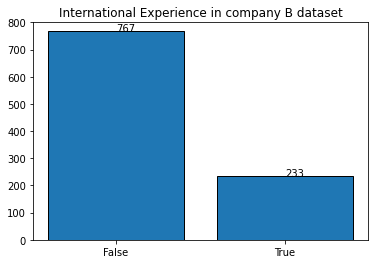

In [41]:
international = [com_df['ind_international_exp'].where(com_df['ind_international_exp'] == False).count(), com_df['ind_international_exp'].where(com_df['ind_international_exp'] == True).count()]
international_labels = ["False", "True"]
plt.ylim([0,800])
plt.title('International Experience in company B dataset')
plt.bar(international_labels, international, ec='black')
addlabels(international_labels, international)
plt.show()

We see here again no missing values and more no experience than international experience

###ind_enterpreneur_exp

ind_entrepeneur_exp is another boolean category, so let's check for missing values and distribution

In [42]:
com_df.ind_entrepeneur_exp.unique()

array([False,  True])

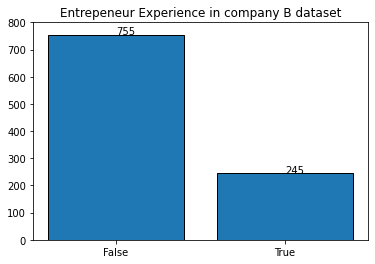

In [43]:
entrepeneur = [com_df['ind_entrepeneur_exp'].where(com_df['ind_entrepeneur_exp'] == False).count(), com_df['ind_entrepeneur_exp'].where(com_df['ind_entrepeneur_exp'] == True).count()]
entrepeneur_labels = ["False", "True"]
plt.ylim([0,800])
plt.title('Entrepeneur Experience in company B dataset')
plt.bar(entrepeneur_labels, entrepeneur, ec='black')
addlabels(entrepeneur_labels, entrepeneur)
plt.show()

We see here again no missing values and more no experience than entrepeneur experience

###ind_languages

This should be the number of languages spoken fluently by the candidate. Assuming that everyone speaks at least 1 language in order to be able to communicate, we can assume that a 0 here consitutes missing data. 

In [44]:
com_df.ind_languages.describe()

count    1000.000000
mean        1.375000
std         0.856217
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: ind_languages, dtype: float64

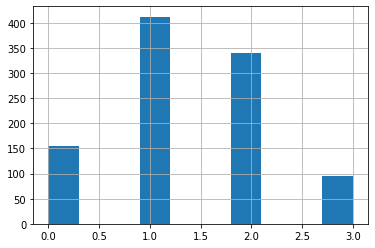

In [45]:
com_df.ind_languages.hist()

What we find here is that there are about 150 instances of candidates speaking no language. This could be a case of missing data, but without access to the domain experts, we cannot be sure. 

###ind_exact_study

ind_exact_study is another boolean category, so let's check for missing values and distribution

In [46]:
com_df.ind_exact_study.unique()

array([ True, False])

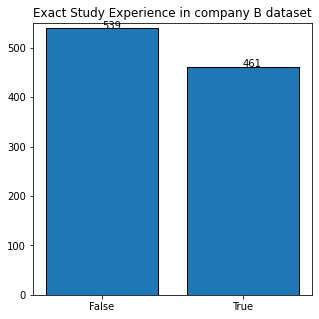

In [47]:
exact_study = [com_df['ind_exact_study'].where(com_df['ind_exact_study'] == False).count(), com_df['ind_exact_study'].where(com_df['ind_exact_study'] == True).count()]
exact_study_labels = ["False", "True"]
fig = plt.figure(figsize =(5, 5))
plt.ylim([0,550])
plt.title('Exact Study Experience in company B dataset')
plt.bar(exact_study_labels, exact_study, ec='black')
addlabels(exact_study_labels, exact_study)
plt.show()

We see here again no missing values and almost a half split of exact study participation

###ind_degree

ind_degree is an ordinal feature that should only contain bachelor, masters and phd, let's see if that's the case and what the distribution is


In [48]:
com_df.ind_degree.unique()

array(['bachelor', 'master', 'phd'], dtype=object)

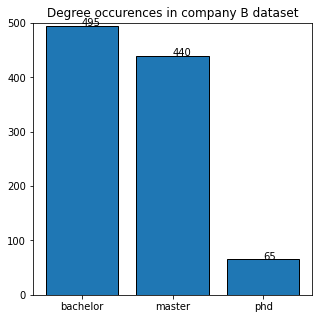

In [49]:
degrees = [com_df['ind_degree'].where(com_df['ind_degree'] == 'bachelor').count(), com_df['ind_degree'].where(com_df['ind_degree'] == 'master').count(), com_df['ind_degree'].where(com_df['ind_degree'] == 'phd').count()]
degree_label = ['bachelor', 'master', 'phd']

fig = plt.figure(figsize =(5, 5))
plt.ylim([0,500])
plt.title('Degree occurences in company B dataset')
plt.bar(degree_label, degrees, ec='black')
addlabels(degree_label, degrees)
plt.show()

>

#**2.5 Data Preprocessing 2**

Now that we have insight on the data, let us create a basic preprocessing function that 0/1 encodes the Boolean data, One-hot encodes the nominal data and rank encodes the ordinal data



First define 4 categories on which we can seperate the features in our dataframe. This is useful for preprocessing the data and might be useful later on as well.

> Boolean data: Data classified with True/False.

> Nominal data: Data classified into different categories without ranking.

> Ordinal data: Data classified into different categories with ranking.

> Numeric data: Numeric data based on normally valued real numbers.


In [64]:
boo_col = ['ind_debateclub', 'ind_programming_exp', 'ind_international_exp', 'ind_entrepeneur_exp', 'ind_exact_study', 'decision']

nom_col = ['gender', 'nationality', 'sport']

ord_col = ['ind_degree']

num_col= ['ind_university_grade', 'age', 'ind_languages']

Second, we create a function that will automatically preprocess any data set that we feed into it. We will use one-hot, 0/1 and label encoding here

In [65]:
def preprocess(df):
  #Check which data is in the dataframe
    features = list(df.columns[:])


    #Check which features are in the supplied dataframe
    df_boo_col = list(boo_col)
    to_boo_remove = []
    for i in df_boo_col:
      if i not in features:
        to_boo_remove.append(i)
    for i in to_boo_remove:
      df_boo_col.remove(i)

    df_nom_col = list(nom_col)
    to_nom_remove = []
    for i in df_nom_col:
      if i not in features:
        to_nom_remove.append(i)
    for i in to_nom_remove:
      df_nom_col.remove(i)


    df_ord_col = list(ord_col)
    to_ord_remove = []
    for i in df_ord_col:
      if i not in features:
        to_ord_remove.append(i)
    for i in to_ord_remove:
      df_ord_col.remove(i)

    df_num_col = list(num_col)
    to_num_remove = []
    for i in df_num_col:
      if i not in features:
        to_num_remove.append(i)
    for i in to_num_remove:
      df_num_col.remove(i)

  # Split boolean, nominal, ordinal, and numerical columns
    df_boo = df[df_boo_col]
    df_nom = df[df_nom_col]
    df_ord = df[df_ord_col]
    df_num = df[df_num_col]

    #0/1 encode boolean columns
    if len(df_boo_col) > 0:
      df_boo = df_boo.astype(int)

    # One-hot encode nominal columns
    if len(df_nom_col) > 0:
      df_nom = pd.get_dummies(data=df_nom)

    # Label encode ordinal columns
    if len(df_ord_col) > 0:
      df_ord = df_ord.replace({'bachelor' : 0, 'master' : 1, 'phd' : 2})

    # Merge nominal, ordinal, and numerical back together
    df = pd.concat([df_boo, df_num, df_nom, df_ord], axis=1)

    return df


##Full Correlation Map

This may seem like a weird tagent, but now that we have our preprocess function, we can preprocess our company dataset to create a correlation heatmap with the categorical features (which were excluded from our initial heatmap)

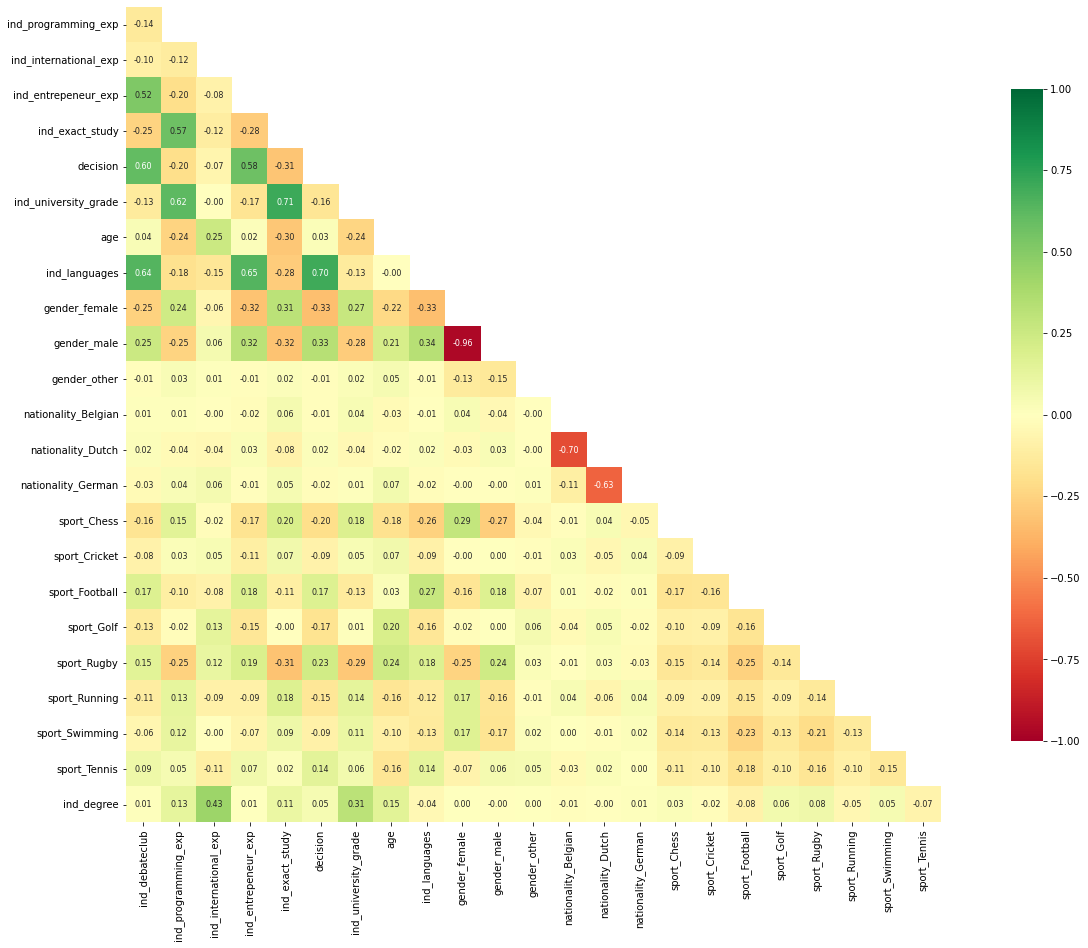

In [66]:
# Create correlation between these columns of data
corr = preprocess(com_df).corr()


plt.figure(figsize=(25,15))

# Create array of 0s in same shape as corr.shape
mask = np.zeros_like(corr)
# Take upper triangle of the shape of 0s
mask[np.triu_indices_from(mask)] = True

# Change mask and correlation to remove empty rows
mask = mask[1:, :-1]
corr = corr.iloc[1:,:-1].copy()

# Choose a diverging palette for the r values (0 should be white)
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Plot the heatmap
sns.heatmap(corr,         # Create heatmap of the df.corr created above
            mask=mask,    # Use the mask to not show repeated boxes
            annot=True,   # Annotate the squares with the r value
            fmt=".2f",    # Use 2 decimals
            annot_kws={"size": 8}, 
            cmap='RdYlGn',    # cmap is the diverging one created above
            square=True,  # Square boxes look better
            cbar_kws={"shrink": .8}, # Shrink color bar to center it
            vmin=-1, vmax=1) # Max and Min values for the colors

plt.show()


# **3. Model Fitting**
Our Research question is as follows:
*Which set of four features best determines an applicant’s hiring for company B?*

In order to answer this we will try to find the best 4 indicator features and the best 4 desciptor features and compare their performance. 

1. Find the best indicator features with DT with RF
> Model type: Decision trees with Random Forests (i.e. sklearn.tree.DecisionTreeClassifier)

  > Features: All combinations of 4 inds

  > Steps:
  > *   Use the ind_df
  > *   Use grid search to prepare all possible set of 4 indicator combinations 
  > *   Fit and evaluate model on each set and pick best accuracy


2. Use SVM to model the found best 4 inds
> Model type: SVM

  > Features: Best 4 inds from M1

  > Steps:
  > *   Use the ind_df
  > *   Fit model with best 4 features from M1
  > *   In case of large disreptancy, can always fit model on second-best M1 set to provide context

3. Use the same SVM model as M2 with descriptor features to get proper comparison of feature effects
> Model type: SVM

  > Features: all descriptors

  > Steps:
  > *   Use the des_df
  > *   Fit model with best all descriptors
  > *   Compare accuracy of M2 and M3


For each model we will undergo a few steps
1. df creation: create a new df that we can mess around with
2. feature selection: drop features that we don't want to use
3. data preprocessing: deal with missing values, use techniques to adjust data
4. Hyperparameter tuning: tune the hyperparameters of the model
4. Train/Test split the data, Train the Model and Validate it

To run these models for step 4, let's create a classifier function that does the train-test split of the data for us and give us a ROC graph as a curve of performance.

In [167]:
def classifier(model, df, drop=['decision'], target=['decision'], frac=0.3):
    # Training set is a sample of 30%. Seed is used to get consistent results while testing


    val = df.sample(frac=frac,random_state=200)
    # training is set acquired by dropping the validation set
    train = df.drop(val.index)

    x = train.drop(drop, axis=1)
    y = np.ravel(train[target].values) # transforming the array to a 1D array
    
    clas = model.fit(x, y)

    valx = val.drop(drop, axis=1)
    valy = val[target].values
    print('-----------------------')
    print("Training results")
    print("Accuracy:")
    print(clas.score(x, y))    

    print("Validation results")
    print("Accuracy:")
    print(clas.score(valx, valy))


    predictions = clas.predict(val.drop(['decision'], axis=1))

    result = pd.DataFrame(columns=['Prediction', 'Actual'])

    result = result.assign(Actual=val['decision'])  
    result = result.assign(Prediction=predictions)

    
    print("Confusion matrix:")
    val_matrix = plot_confusion_matrix(model, valx,valy, cmap=plt.cm.Reds)
    val_matrix.ax_.set_title('Confusion Matrix Validation Set')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.gcf().axes[0].tick_params(colors='black')
    plt.gcf().axes[1].tick_params(colors='black')
    plt.gcf().set_size_inches(10,6)
    plt.show()
    
    try:   
      #Prediction probabilties
      base_probs = [0 for _ in range(len(valy))]
      model_probs = clas.predict_proba(valx)
      #Keeping probabilities for positive outcomes
      model_probs = model_probs[:,1]
      #Compute AUROC values
      base_auc = roc_auc_score(valy, base_probs)
      model_auc = roc_auc_score(valy, model_probs)
      #Display AUROC scores
      print("Random prediction: AUROC = %.3f" %(base_auc))
      print("Model prediction: AUROC = %.3f" %(model_auc))
      #Calculate ROC curve
      base_fpr, base_tpr, _ = roc_curve(valy, base_probs)
      model_fpr, model_tpr, _ = roc_curve(valy, model_probs)
      #Plot the ROC curve
      plt.figure(figsize=(15,10))
      plt.plot(base_fpr, base_tpr, linestyle='--', label='Random prediction (AUROC = %.3f)' %base_auc)
      plt.plot(model_fpr, model_tpr, linestyle='--', label='Random prediction (AUROC = %.3f)' %model_auc)
      plt.title('ROC Plot')
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.legend()
      plt.show()
    except:
      pass

    return confusion_matrix(valy, clas.predict(valx)), result
    
    

We'll also create an evaluation function which calculates all the statistical concepts we can derive from the confusion matrix. This is something that we can use to evaluate the general performance of the model or compare the performance of the model on sub-groups

In [168]:
def evaluation(results):
  true_positive = results[1,1]
  false_positive = results[0,1]
  false_negative = results[1,0]
  true_negative = results[0,0]
  actual_positive = true_positive + false_negative
  actual_negative = false_positive + true_negative
  precision = true_positive / (true_positive + false_positive)
  false_discovery_rate = false_positive / (true_positive + false_positive)
  false_omission_rate = false_negative / (true_negative + false_negative)
  negative_predictive_value = true_negative / (true_negative + false_negative)
  recall = true_positive / actual_positive
  false_positive_rate = false_positive / actual_negative
  false_negative_rate = false_negative / actual_positive
  true_negative_rate = true_negative / actual_negative

  return [true_positive, false_positive, false_negative, true_negative, actual_positive, actual_negative, precision, false_discovery_rate, false_omission_rate, negative_predictive_value, recall, false_positive_rate, false_negative_rate, true_negative_rate]

And a function that prints the evaluation

In [169]:
def print_eval(model_result):
  print('---------------------------')
  print('True Positive =  ', model_result[0])
  print('False Positive = ', model_result[1])
  print('False Negative = ', model_result[2])
  print('True Negative = ', model_result[3])
  print('Actual Positive = ', model_result[4])
  print('Actual Negative = ', model_result[5])
  print('Precision =', model_result[6])
  print('False Discovery Rate = ', model_result[7])
  print('False Omission Rate = ', model_result[8])
  print('Negative Predictive Value = ', model_result[10])
  print('Recall = ', model_result[11])
  print('False Positive Rate = ', model_result[12])
  print('True Negative Rate = ', model_result[13])

Also, we need to make sure that we find the right hyperparameters for our data. This will be done with the following function using gridsearch

In [170]:
def classifierRF(model, df, kfold=5, ratio=0.3, state=200):
    # Separate the test set for final model evaluation
    #test = df.sample(frac=frac,random_state=200)
    # training is set acquired by dropping the validation set

    # splitting data
    x,y = df.drop('decision', axis='columns'), df['decision']
    x_train, x_test, y_train, y_test = train_test_split(x,
                                                          y,
                                                          random_state=state,
                                                          test_size=ratio)
    
    # hyperparameters
    params = {'n_estimators':[50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200],
              'criterion':['gini', 'entropy','log_loss'],
              'max_features':['log2', 'sqrt'],
              'max_samples':[10,20,30,40,50,60,70,80,90,100]}



          
    # gridsearch with kfold
    grid = GridSearchCV(estimator=model,
                        param_grid=params
                        ,cv=kfold)
    
    # fitting data
    grid.fit(x_train, y_train)
    grid.score(x_test, y_test)

    # presenting result
    print('------------------------------------------------------')
    print("Hyperparameter optimization for RandomForest: ")
    print('Grid Search Result')
    print(f'Best estimator: {grid.best_estimator_},\nBest score: {grid.best_score_},\nBest params: {grid.best_params_}')
    #print(pd.DataFrame(grid.cv_results_))


In [171]:
def classifierSVM(model, df, kfold=5, ratio=0.3, state=200):

    # Separate the test set for final model evaluation
    #test = df.sample(frac=frac,random_state=200)
    # training is set acquired by dropping the validation set
    #train = df.drop(test.index)

    x,y = df.drop('decision', axis='columns'), df['decision']
    x_train, x_test, y_train, y_test = train_test_split(x,
                                                          y,
                                                          random_state=state,
                                                          test_size=ratio)
    
    # hyperparameters
    params = {'C':[1.0, 2.0, 3.0, 4.0, 5.0],
          'kernel':['poly','rbf'],
          'gamma':['scale', 'auto']}
    # gridsearch with kfold
    grid = GridSearchCV(estimator=model,
                        param_grid=params
                        ,cv=KFold(n_splits=kfold))
    
    # fitting data
    grid.fit(x_train, y_train)
    grid.score(x_test, y_test)

    # presenting result
    print("Hyperparameter optimization for SVM: ")
    print('Grid Search Result')
    print(f'Best estimator: {grid.best_estimator_},\nBest score: {grid.best_score_},\nBest params: {grid.best_params_}')
    #print(pd.DataFrame(grid.cv_results_))

## **Model 1: Decision Trees with Random Forests - 4 Indicators**

### 1. Create Dataset
Since Model 1 is only allowed to use indicators, m1_df will be made up from the indicator dataframe

In [172]:
m1_df = ind_df

2. Feature selection

Here we want to find what set of indicators gives us the best prediction accuracy. To do this, we take the list of all indicators and make all possible unique sets of 4 from them. 


We do this by using the combination function from itertools and thus create a set list of all possible unique combinations of sets, where order of items is not accounted for in uniqueness (so [A,B,C] and [A,C,B] are see as the same list).

In [173]:
sets = combinations(indicator,4)
set_list = []
for i in sets:
  set_list.append(i)

Once this has been created, let's take a look at how many sets of indicators we have

In [174]:
len(set_list)

70

In order to test these 70 sets, we need to create a few functions which do the following.


*  Takes all the sets and rank orders them based on performance

> 1. Drop the all the indicators from the dataset apart from the ones in the set
> 2. Preprocess the dataset 
> 3. Split Training and Test set as per the Classifier function and split the training set into training and validation, as we're not testing the model, just using validation set to find the best indicator set as hyperparameter





In [175]:
def evaluate_inds(setlist):
  results= []
  for i in setlist: 
    i_df = drop_features(i)
    i_df = preprocess(i_df)
    accuracy = eval_classifier(RandomForestEntropy(), i_df)
    results.append((accuracy, i))
  results.sort(reverse=True)
  return results

In [176]:
def drop_features(setlist):
  to_drop_inds = list(indicator)
  for i in setlist:
    to_drop_inds.remove(i)
  i_df = ind_df.drop(to_drop_inds, axis=1)
  return i_df


In [177]:
def eval_classifier(model, df, drop=['decision'], target=['decision'], frac=0.3):
    # Test set is a sample of 30%. Seed is used to get consistent results while testing
    # Separate the test set for final model evaluation
    test = df.sample(frac=frac,random_state=200)
    # training is set acquired by dropping the validation set
    train = df.drop(test.index)
    #Sample 20% of training data for validation set for evaluation
    val = df.sample(frac=0.2,random_state=200)
    train = df.drop(val.index)

    x = train.drop(drop, axis=1)
    y = np.ravel(train[target].values) # transforming the array to a 1D array
    
    clas = model.fit(x, y)

    valx = val.drop(drop, axis=1)
    valy = val[target].values
    return clas.score(valx, valy)

We now also introduce the Decision Tree model with Random forests using Entropy with default hyperparameters. We will refine these hyperparameters with grid search once we have our chosen set of features

In [178]:

def RandomForestEntropy():
  """
  A Random forest classifier using entropy as quality of a split
  """
  return RandomForestClassifier(
      n_estimators=200,
      bootstrap=True,
      criterion='entropy',
      max_features='sqrt',
      max_samples=50
  )


Then we run the evaluate_inds function

In [179]:
set_results_RF = evaluate_inds(set_list)
print(set_results_RF)

[(0.91, ('ind_programming_exp', 'ind_international_exp', 'ind_languages', 'ind_university_grade')), (0.91, ('ind_programming_exp', 'ind_international_exp', 'ind_languages', 'ind_degree')), (0.91, ('ind_programming_exp', 'ind_entrepeneur_exp', 'ind_languages', 'ind_degree')), (0.905, ('ind_languages', 'ind_exact_study', 'ind_degree', 'ind_university_grade')), (0.905, ('ind_international_exp', 'ind_entrepeneur_exp', 'ind_languages', 'ind_university_grade')), (0.905, ('ind_debateclub', 'ind_programming_exp', 'ind_international_exp', 'ind_languages')), (0.9, ('ind_programming_exp', 'ind_languages', 'ind_exact_study', 'ind_degree')), (0.9, ('ind_programming_exp', 'ind_international_exp', 'ind_entrepeneur_exp', 'ind_languages')), (0.9, ('ind_programming_exp', 'ind_entrepeneur_exp', 'ind_languages', 'ind_university_grade')), (0.9, ('ind_entrepeneur_exp', 'ind_languages', 'ind_degree', 'ind_university_grade')), (0.895, ('ind_programming_exp', 'ind_languages', 'ind_degree', 'ind_university_grad

What we find is that programming experience, international experience, languages and university grade return the highest validation accuracy. 

So we will use this set of features to test our model with

In [180]:
m1_df = drop_features(set_results_RF[0][1])

3. Data Preprocessing

Now we preprocess the data from the chosen dataset

In [181]:
m1_df = preprocess(m1_df)


**4**. Hyperparameter Tuning

Before we run our RandomForestClassifier, we need to find the best hyperparameters

**Now that this has been run, don't run it again (takes 20 mins)**

In [219]:
# commented out so it won't retrain
#classifierRF(RandomForestClassifier(),m1_df)

This gives us the following best hyperparameters

Best score: 0.8757142857142857,
Best params: {'criterion': 'gini', 'max_features': 'sqrt', 'max_samples': 50, 'n_estimators': 200}

Given these hyperparameters, we can now create a RandomForestClassifier with these params to fit our model


In [183]:
def RandomForestBest():
  return RandomForestClassifier(
      n_estimators=200,
      bootstrap=True,
      criterion='gini',
      max_features='sqrt',
      max_samples=50
  )

**5**. Classifier
Then we run our classifier to get our accuracy, confusion matrix and ROC curve

-----------------------
Training results
Accuracy:
0.8757142857142857
Validation results
Accuracy:
0.8566666666666667
Confusion matrix:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


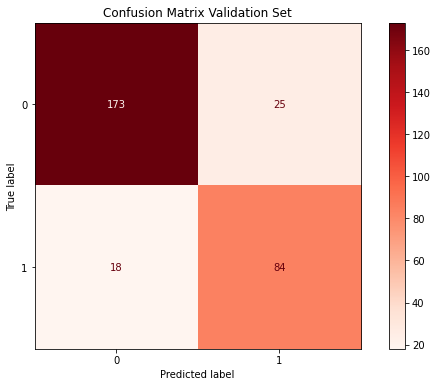

Random prediction: AUROC = 0.500
Model prediction: AUROC = 0.940


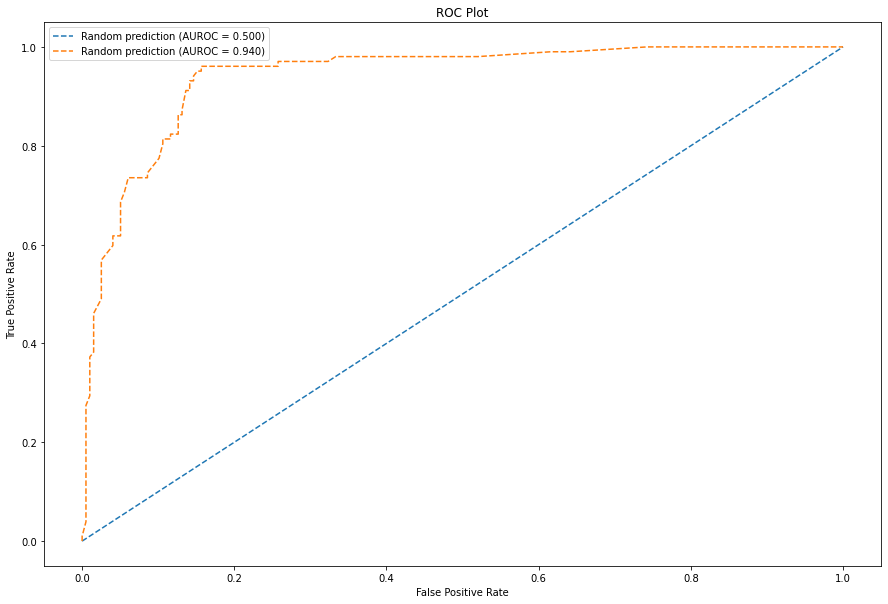

-----------------------
Training results
Accuracy:
0.8771428571428571
Validation results
Accuracy:
0.8866666666666667
Confusion matrix:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


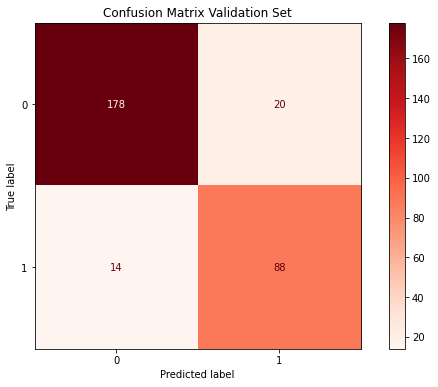

Random prediction: AUROC = 0.500
Model prediction: AUROC = 0.943


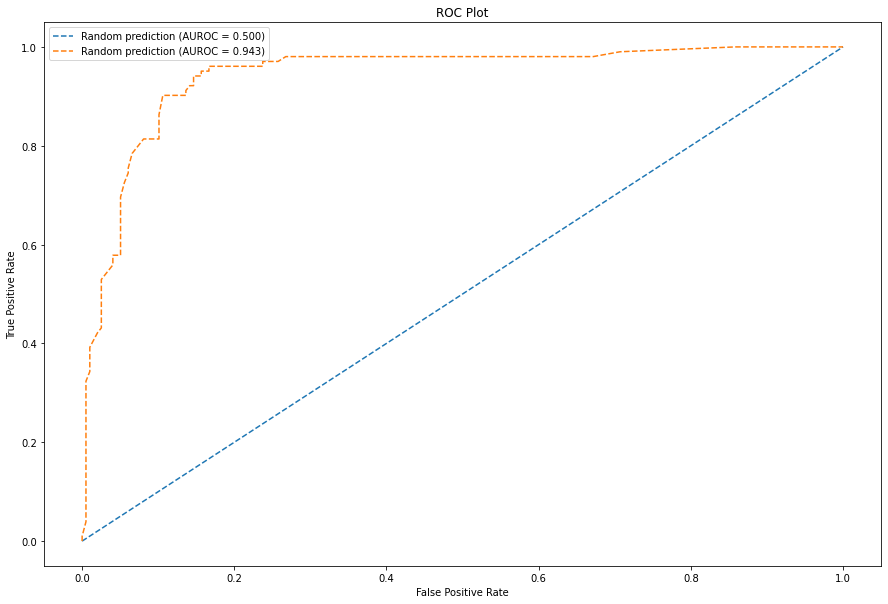

In [184]:
m1_results = classifier(RandomForestBest(), m1_df)
m1_2nd_results = classifier(RandomForestBest(), m1_df)
m1_csv = pd.merge(m1_results[1], init_df['Id'], left_index=True, right_index=True).to_csv('m1.csv')


We can also acquire the full statistical results under m1_evalaution

In [186]:
m1_evaluation = evaluation(m1_results[0])

In [187]:
print_eval(m1_evaluation)

---------------------------
True Positive =   84
False Positive =  25
False Negative =  18
True Negative =  173
Actual Positive =  102
Actual Negative =  198
Precision = 0.7706422018348624
False Discovery Rate =  0.22935779816513763
False Omission Rate =  0.09424083769633508
Negative Predictive Value =  0.8235294117647058
Recall =  0.12626262626262627
False Positive Rate =  0.17647058823529413
True Negative Rate =  0.8737373737373737


Okay, so we have a test accuracy of 0.8766666666666667. Now we move on to Model 2 to see what the differences are for this feature set on a different model. 

If we get wildly different results, then that may indicate that there is bias from the model to favour these features for prediction and that they may actually not be the best predictors.

## **Model 2: Choice Model - Choice Indicators**

### 1. Create Dataset + Feature Selection
The second model will be the actual experimental model that will be compared to the other experimental model of the descriptors. This will allow us to properly test with only the features as variables. 

So first, let's get the features that we found from M1

In [188]:
m2_df = drop_features(set_results_RF[0][1])

2. Data Preprocessing

We preprocess the data just like M1

In [189]:
m2_df = preprocess(m2_df)

3. Hyperparameter tuning


Before we run the classifier, we need to tune the SVM hyperparamters by using grid search to find the best

**Now that this has been run, don't run it again (takes 20 mins)**

In [218]:
# commented out so it won't retrain
#classifierSVM(SVC(),m2_df)

This gives us the following best hyperparameters
Best params: {'C': 2.0, 'gamma': 'auto', 'kernel': 'rbf'}


4. Classifier

Given these hyperparameters, we can now create a SVM with these params to fit our model

In [191]:
def SVBest():

  return SVC(
      C= 2.0,
      kernel='rbf',
      gamma='auto',
      probability=True

  )

-----------------------
Training results
Accuracy:
0.8871428571428571
Validation results
Accuracy:
0.8766666666666667
Confusion matrix:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


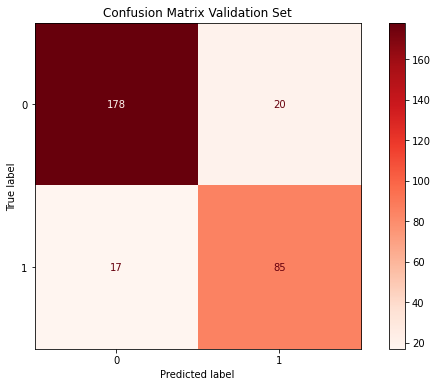

Random prediction: AUROC = 0.500
Model prediction: AUROC = 0.941


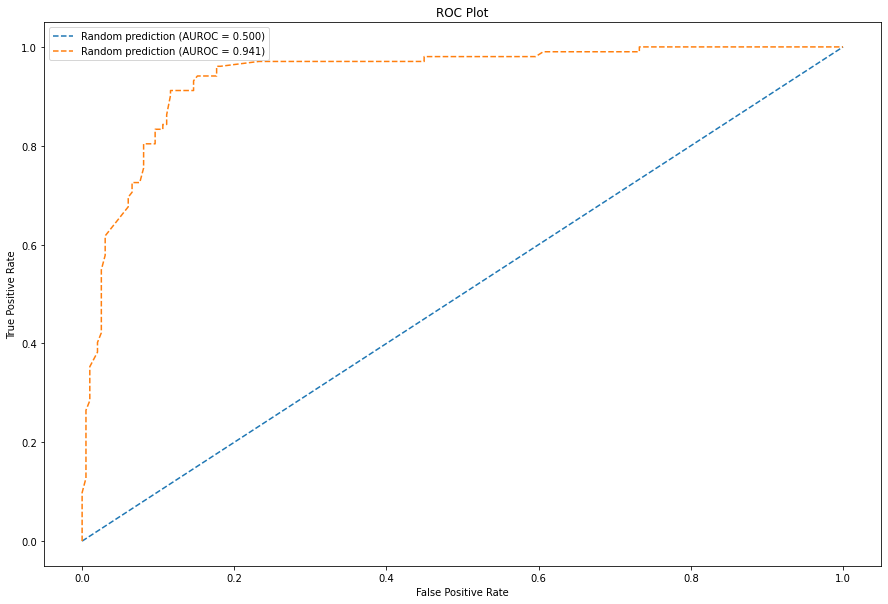

In [192]:
m2_results = classifier(SVBest(), m2_df)
m2_csv = pd.merge(m2_results[1], init_df['Id'], left_index=True, right_index=True).to_csv('m2.csv')


Statistical Evaluation

In [194]:
m2_evaluation = evaluation(m2_results[0])

In [195]:
print_eval(m2_evaluation)

---------------------------
True Positive =   85
False Positive =  20
False Negative =  17
True Negative =  178
Actual Positive =  102
Actual Negative =  198
Precision = 0.8095238095238095
False Discovery Rate =  0.19047619047619047
False Omission Rate =  0.08717948717948718
Negative Predictive Value =  0.8333333333333334
Recall =  0.10101010101010101
False Positive Rate =  0.16666666666666666
True Negative Rate =  0.898989898989899


Here we also see a accuracy of 0.8766666666666667, which means that regardless of the model, this feature set is a good predictor. So now let's compare this feature set to the descriptor feature set

## **Model 3: Choice Model - Choice Descriptors**

### 1. Create Dataset
Now we will use the same model as M2, but then use 4 descriptors to compare the difference in results of the best indicators with descriptors

First let's create the dataset our of the descriptor dataset

In [196]:
m3_df = des_df


2. Feature selection

As we used 4 indicators and there are only 4 descriptors, we do not drop any descriptors

In [198]:
to_drop_des = [] #keep all descriptors
m3_df = m3_df.drop(to_drop_des, axis=1)

3. Data Preprocessing

Now we preprocess our data

In [199]:
m3_df = preprocess(m3_df)
m3_df

,decision,age,gender_female,gender_male,gender_other,nationality_Belgian,nationality_Dutch,nationality_German,sport_Chess,sport_Cricket,sport_Football,sport_Golf,sport_Rugby,sport_Running,sport_Swimming,sport_Tennis
1000,0,21,1,0,0,0,1,0,0,0,0,0,0,0,1,0
1001,0,27,1,0,0,0,1,0,1,0,0,0,0,0,0,0
1002,1,25,1,0,0,0,1,0,0,0,0,0,1,0,0,0
1003,0,28,1,0,0,0,1,0,1,0,0,0,0,0,0,0
1004,1,30,0,1,0,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,28,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1996,0,23,1,0,0,1,0,0,0,1,0,0,0,0,0,0
1997,1,26,0,1,0,0,1,0,0,0,1,0,0,0,0,0
1998,0,23,1,0,0,0,0,1,0,0,0,0,0,1,0,0


4. Classifier


Then we run the classifier according to the hyperparams from M2 to ensure we have the same model

-----------------------
Training results
Accuracy:
0.7828571428571428
Validation results
Accuracy:
0.7466666666666667
Confusion matrix:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


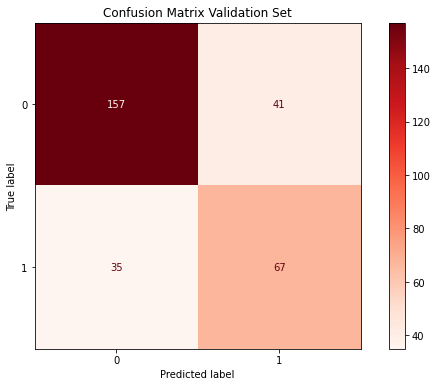

Random prediction: AUROC = 0.500
Model prediction: AUROC = 0.779


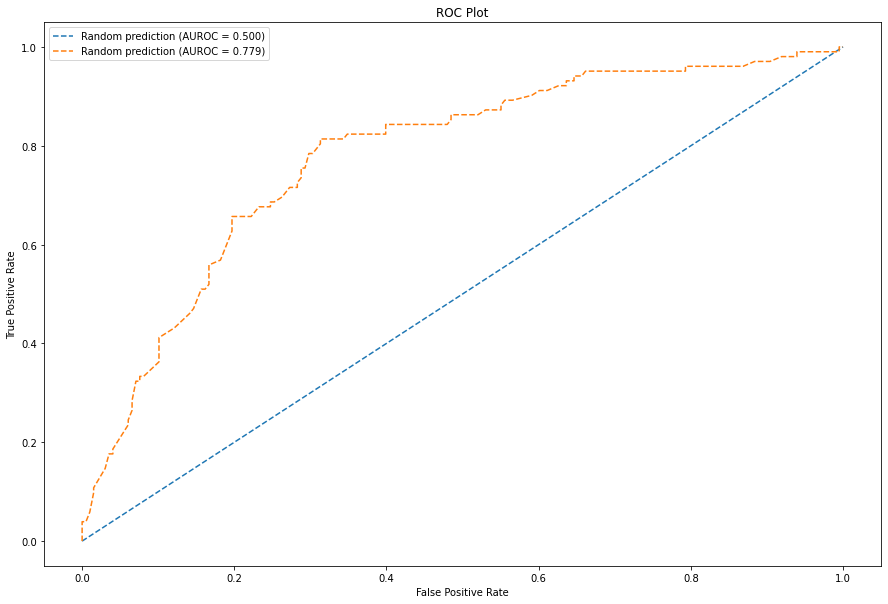

In [200]:
m3_results = classifier(SVBest(), m3_df)
m3_csv = pd.merge(m3_results[1], init_df['Id'], left_index=True, right_index=True).to_csv('m3.csv')


Statistical Evaluation

In [209]:
m3_evaluation = evaluation(m3_results[0])

In [210]:
print_eval(m3_evaluation)

---------------------------
True Positive =   67
False Positive =  41
False Negative =  35
True Negative =  157
Actual Positive =  102
Actual Negative =  198
Precision = 0.6203703703703703
False Discovery Rate =  0.37962962962962965
False Omission Rate =  0.18229166666666666
Negative Predictive Value =  0.6568627450980392
Recall =  0.20707070707070707
False Positive Rate =  0.3431372549019608
True Negative Rate =  0.7929292929292929


There we see that the accuracy of descriptors is lower, as was expected. 

# **4. Result analysis**

Now that we have our results and evaluations for each of the models, we can use this to create data visualizations/comparisons for our fairness analysis and reporting.


In [211]:
bias_df = ind_df
bias_df = preprocess(drop_features(set_results_RF[0][1]))
bias_df = pd.concat([bias_df, des_df.drop(['decision'], axis=1)], axis=1)
bias_df

,ind_programming_exp,ind_international_exp,decision,ind_university_grade,ind_languages,gender,age,nationality,sport
1000,0,0,0,58,0,female,21,Dutch,Swimming
1001,0,1,0,67,0,female,27,Dutch,Chess
1002,0,0,1,56,2,female,25,Dutch,Rugby
1003,0,1,0,64,0,female,28,Dutch,Chess
1004,0,0,1,63,3,male,30,Dutch,Rugby
...,...,...,...,...,...,...,...,...,...
1995,0,0,1,71,2,male,28,Dutch,Tennis
1996,0,0,0,55,1,female,23,Belgian,Cricket
1997,0,0,1,58,2,male,26,Dutch,Football
1998,1,0,0,61,1,female,23,German,Running


In [212]:
def bias_classifier(model, df, drop=['decision'], target=['decision'], frac=0.3):
    # Training set is a sample of 30%. Seed is used to get consistent results while testing


    val = df.sample(frac=frac,random_state=200)
    # training is set acquired by dropping the validation set
    train = df.drop(val.index)

    x = train.drop(drop, axis=1)
    y = np.ravel(train[target].values) # transforming the array to a 1D array
    
    clas = model.fit(x, y)

    valx = val.drop(drop, axis=1)
    valy = val[target].values
 
    return clas.score(valx, valy), confusion_matrix(valy, clas.predict(valx))


In [213]:
# Model 1 and 2
# genders
score_male = bias_df[bias_df['gender'] == 'male'].drop(descriptor, axis=1)
score_female = bias_df[bias_df['gender'] == 'female'].drop(descriptor, axis=1)
score_other = bias_df[bias_df['gender'] == 'other'].drop(descriptor, axis=1)

# nationalities
score_dutch =  bias_df[bias_df['nationality'] == 'dutch'].drop(descriptor, axis=1)
score_german = bias_df[bias_df['nationality'] == 'german'].drop(descriptor, axis=1)
score_belgian = bias_df[bias_df['nationality'] == 'belgian'].drop(descriptor, axis=1)

# sports
score_chess = bias_df[bias_df['sport'] == 'chess'].drop(descriptor, axis=1)
score_cricket = bias_df[bias_df['sport'] == 'cricket'].drop(descriptor, axis=1)
score_football =bias_df[bias_df['sport'] == 'football'].drop(descriptor, axis=1)
score_golf = bias_df[bias_df['sport'] == 'golf'].drop(descriptor, axis=1)
score_rugby = bias_df[bias_df['sport'] == 'rugby'].drop(descriptor, axis=1)
score_running = bias_df[bias_df['sport'] == 'running'].drop(descriptor, axis=1)
score_swimming = bias_df[bias_df['sport'] == 'swimming'].drop(descriptor, axis=1)
score_tennis = bias_df[bias_df['sport'] == 'tennis'].drop(descriptor, axis=1)

# age groups
score_age_young = bias_df[bias_df['age'] < 26].drop(descriptor, axis=1)
score_age_old = bias_df[bias_df['age'] >= 26].drop(descriptor, axis=1)

In [214]:
# Model 3

# gender
score_male = bias_classifier(SVBest(),m3_df[(m3_df['gender_male'] == 1 )])
score_female = bias_classifier(SVBest(),m3_df[(m3_df['gender_female'] == 1 )])
score_other = bias_classifier(SVBest(),m3_df[(m3_df['gender_other'] == 1 )])

#nationality
score_dutch = bias_classifier(SVBest(),m3_df[(m3_df['nationality_Dutch'] == 1)])
score_belgian = bias_classifier(SVBest(),m3_df[(m3_df['nationality_Belgian'] == 1)])
score_german = bias_classifier(SVBest(),m3_df[(m3_df['nationality_German'] == 1)])


# gender-age
score_male_old = bias_classifier(SVBest(),m3_df[(m3_df['gender_male'] == 1 ) & (m3_df['age'] >= 26)])
score_male_young = bias_classifier(SVBest(),m3_df[(m3_df['gender_male'] == 1 ) & (m3_df['age'] < 26)])

score_female_old = bias_classifier(SVBest(),m3_df[(m3_df['gender_female'] == 1 ) & (m3_df['age'] >= 26)])
score_female_young = bias_classifier(SVBest(),m3_df[(m3_df['gender_female'] == 1 ) & (m3_df['age'] < 26)])

# score_other_old = bias_classifier(SVBest(),m3_df[(m3_df['gender_other'] == 1 ) & (m3_df['age'] >= 26)]) Not applicable
score_other_young = bias_classifier(SVBest(),m3_df[(m3_df['gender_other'] == 1 ) & (m3_df['age'] < 26)])

# gender-nationality
score_male_dutch = bias_classifier(SVBest(),m3_df[(m3_df['gender_male'] == 1 ) & (m3_df['nationality_Dutch'] == 1)])
score_male_belgian = bias_classifier(SVBest(),m3_df[(m3_df['gender_male'] == 1 ) & (m3_df['nationality_Belgian'] == 1)])
score_male_german = bias_classifier(SVBest(),m3_df[(m3_df['gender_male'] == 1 ) & (m3_df['nationality_German'] == 1)])

score_female_dutch = bias_classifier(SVBest(),m3_df[(m3_df['gender_female'] == 1 ) & (m3_df['nationality_Dutch'] == 1)])
score_female_belgian = bias_classifier(SVBest(),m3_df[(m3_df['gender_female'] == 1 ) & (m3_df['nationality_Belgian'] == 1)])
score_female_german = bias_classifier(SVBest(),m3_df[(m3_df['gender_female'] == 1 ) & (m3_df['nationality_German'] == 1)])

score_other_dutch = bias_classifier(SVBest(),m3_df[(m3_df['gender_other'] == 1 ) & (m3_df['nationality_Dutch'] == 1)])
# score_other_belgian = bias_classifier(SVBest(),m3_df[(m3_df['gender_other'] == 1 ) & (m3_df['nationality_Belgian'] == 1)]) NON EXISTENT
# score_other_german = bias_classifier(SVBest(),m3_df[(m3_df['gender_other'] == 1 ) & (m3_df['nationality_German'] == 1)]) NON EXISTENT

# age-nationality
score_young_dutch = bias_classifier(SVBest(),m3_df[(m3_df['age'] < 26) & (m3_df['nationality_Dutch'] == 1)])
score_young_belgian = bias_classifier(SVBest(),m3_df[(m3_df['age'] < 26) & (m3_df['nationality_Belgian'] == 1)])
score_young_german = bias_classifier(SVBest(),m3_df[(m3_df['age'] < 26) & (m3_df['nationality_German'] == 1)])

score_old_dutch = bias_classifier(SVBest(),m3_df[(m3_df['age'] >= 26) & (m3_df['nationality_Dutch'] == 1)])
score_old_belgian = bias_classifier(SVBest(),m3_df[(m3_df['age'] >= 26)& (m3_df['nationality_Belgian'] == 1)])
score_old_german = bias_classifier(SVBest(),m3_df[(m3_df['age'] >= 26) & (m3_df['nationality_German'] == 1)])

In [215]:
def bias_eval(results):
  true_positive = results[1,1]
  false_positive = results[0,1]
  false_negative = results[1,0]
  true_negative = results[0,0]
  actual_positive = true_positive + false_negative
  precision = true_positive / (true_positive + false_positive)
  recall = true_positive / actual_positive
  return precision,recall



In [216]:
bias = pd.DataFrame(
    {
    'male':[score_male[0], bias_eval(score_male[1])[0], bias_eval(score_male[1])[1]],
    'other':[score_other[0], bias_eval(score_other[1])[0], bias_eval(score_other[1])[1]],
    'female':[score_female[0], bias_eval(score_female[1])[0], bias_eval(score_female[1])[1]],
    'dutch':[score_dutch[0], bias_eval(score_dutch[1])[0], bias_eval(score_dutch[1])[1]],
    'belgian':[score_belgian[0], bias_eval(score_belgian[1])[0], bias_eval(score_belgian[1])[1]],
    'german':[score_german[0], bias_eval(score_german[1])[0], bias_eval(score_german[1])[1]],
    'male_old':[score_male_old[0], bias_eval(score_male_old[1])[0], bias_eval(score_male_old[1])[1]],
    'male_young':[score_male_young[0], bias_eval(score_male_young[1])[0], bias_eval(score_male_young[1])[1]],
    'female_old':[score_female_old[0], bias_eval(score_female_old[1])[0], bias_eval(score_female_old[1])[1]],
    'female_young':[score_female_young[0], bias_eval(score_female_young[1])[0], bias_eval(score_female_young[1])[1]],
    'other_young':[score_other_young[0], bias_eval(score_other_young[1])[0], bias_eval(score_other_young[1])[1]],
    'male_dutch':[score_male_dutch[0], bias_eval(score_male_dutch[1])[0], bias_eval(score_male_dutch[1])[1]],
    'male_belgian':[score_male_belgian[0], bias_eval(score_male_belgian[1])[0], bias_eval(score_male_belgian[1])[1]],
    'male_german':[score_male_german[0], bias_eval(score_male_german[1])[0], bias_eval(score_male_german[1])[1]],
    'female_dutch':[score_female_dutch[0], bias_eval(score_female_dutch[1])[0], bias_eval(score_female_dutch[1])[1]],
    'female_belgian':[score_female_belgian[0], bias_eval(score_female_belgian[1])[0], bias_eval(score_female_belgian[1])[1]],
    'female_german':[score_female_german[0], bias_eval(score_female_german[1])[0], bias_eval(score_female_german[1])[1]],
     'other_dutch':[score_other_dutch[0], bias_eval(score_other_dutch[1])[0], bias_eval(score_other_dutch[1])[1]],
     'young_dutch':[score_young_dutch[0], bias_eval(score_young_dutch[1])[0], bias_eval(score_young_dutch[1])[1]],
     'young_belgian':[score_young_belgian[0], bias_eval(score_young_belgian[1])[0], bias_eval(score_young_belgian[1])[1]],
     'young_german':[score_young_german[0], bias_eval(score_young_german[1])[0], bias_eval(score_young_german[1])[1]],
     'old_dutch':[score_old_dutch[0], bias_eval(score_old_dutch[1])[0], bias_eval(score_old_dutch[1])[1]],
     'old_belgian':[score_old_belgian[0], bias_eval(score_old_belgian[1])[0], bias_eval(score_old_belgian[1])[1]],
     'old_german':[score_old_german[0], bias_eval(score_old_german[1])[0], bias_eval(score_old_german[1])[1]]
     }
     )


df_bias = pd.DataFrame({
    'subgroups': bias.columns,
    'accuracy':bias.iloc[0].values,
    'precision':bias.iloc[1].values,
    'recall':bias.iloc[2].values}).fillna(0)

df_bias

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys


,subgroups,accuracy,precision,recall
0,male,0.704403,0.607143,0.957746
1,other,0.666667,0.000000,0.000000
2,female,0.844444,0.000000,0.000000
3,dutch,0.771784,0.716667,0.530864
4,belgian,0.727273,1.000000,0.181818
5,german,0.851852,0.000000,0.000000
6,male_old,0.648649,0.538462,0.795455
7,male_young,0.604167,0.558824,0.826087
8,female_old,0.811594,0.000000,0.000000
9,female_young,0.820896,0.000000,0.000000


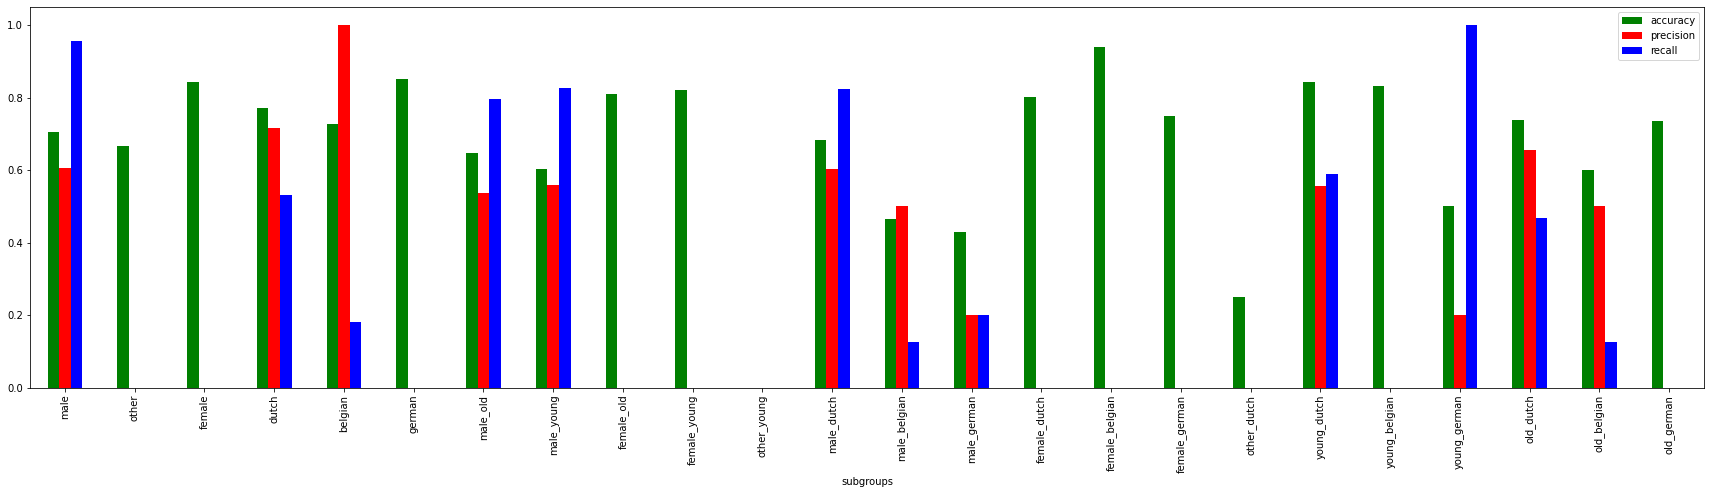

In [217]:
df_bias[['subgroups', 'accuracy', 'precision', 'recall']].plot(x='subgroups', kind='bar', figsize=(30,7), color=['green','red','blue'],width=0.5)